In [1]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.cross_resonance as _xr
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg
import qubic.job_manager_jpm as _jm
import chipcalibration.rabi_experiments as _rabi

In [2]:
reload(_xr)
reload(_rabi)
reload(_jm)

<module 'qubic.job_manager_jpm' from '/home/jpmarceaux/software/qubic/job_manager_jpm.py'>

In [3]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}

In [4]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')
jobman = _jm.JobManager(fpga_config, channel_config, runner, qchip)

In [5]:
target_qid = 'Q2'
control_qid = 'Q3'

In [6]:
# GMM Rabi 
gmm_rabi = _rabi.GMMRabi([target_qid, control_qid], 0.2, np.linspace(1.e-9, 50.e-9, 10), 
                       channel_configs=channel_config)

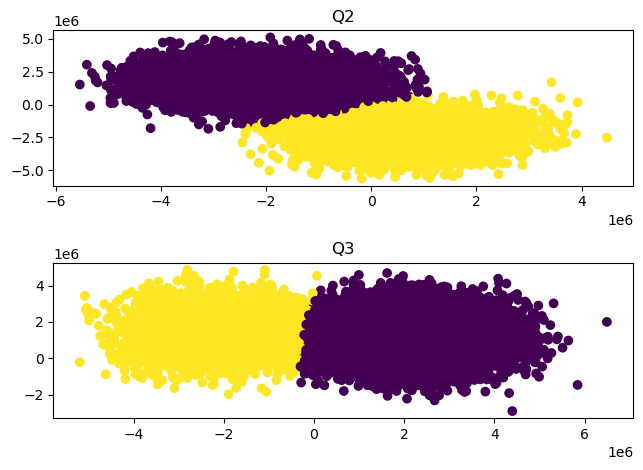

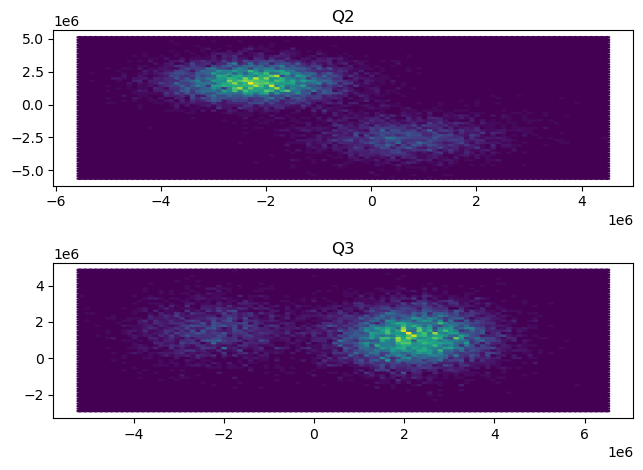

In [7]:
gmm_rabi.run_and_report(jobman, 1000, qchip)

In [141]:
jobman = _jm.JobManager(fpga_config, channel_config, runner, qchip,
                       gmm_manager=gmm_rabi.gmm_manager)

In [126]:
reload(_xr)

<module 'chipcalibration.cross_resonance' from '/home/jpmarceaux/chipcalibration/chipcalibration/cross_resonance.py'>

In [127]:
pulse_width_interval = np.linspace(100.e-9, 300.e-9, 10)
drive_amp_interval = np.linspace(0.3, 0.6, 10)

In [128]:
ixr = _xr.CrossResonanceCalibration(control_qid, target_qid, 
                                    pulse_width_interval, drive_amp_interval)

In [129]:
%matplotlib inline

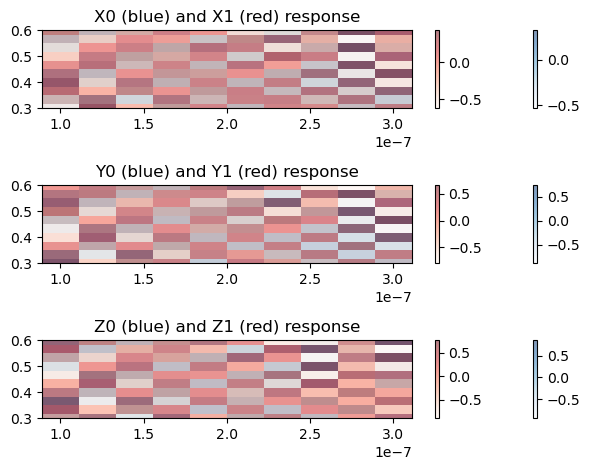

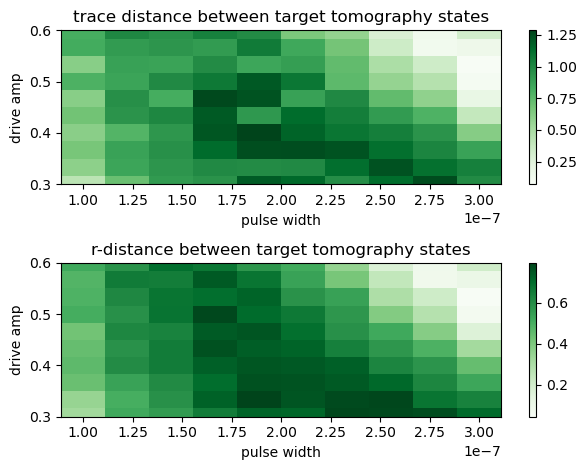

1

In [130]:
ixr.run_and_report(jobman, 1000, qchip)

In [145]:
pulse_width_interval = np.linspace(150.e-9, 200.e-9, 5)
drive_amp_interval = np.linspace(0.45, 0.55, 5)

In [146]:
ixr = _xr.CrossResonanceCalibration(control_qid, target_qid, 
                                    pulse_width_interval, drive_amp_interval)

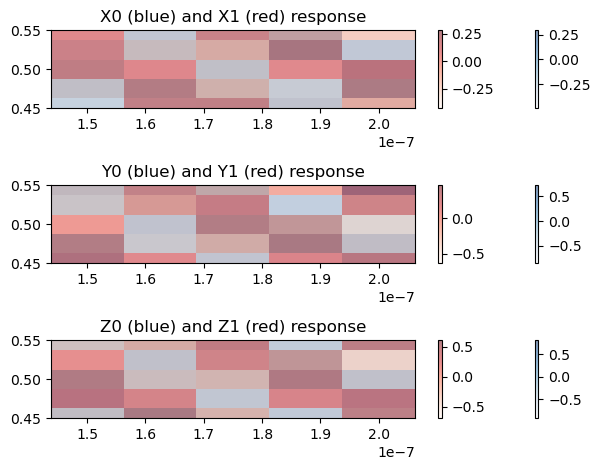

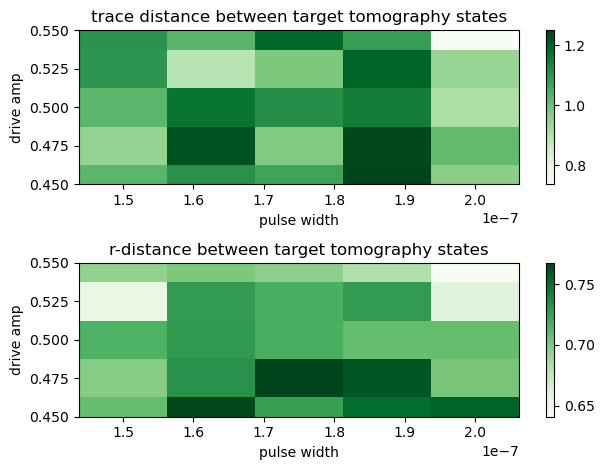

1

In [147]:
ixr.run_and_report(jobman, 1000, qchip)

I'll use a pulse width of 185ns and a drive amp range of [0.45, 0.5]